## Discrete-time competitive Beverton-Holt model

\begin{align}
N_{1,t+1}=\dfrac{r_1N_{1,t}}{1+a_{11}N_{1,t}+a_{12}N_{2,t}} \\
N_{2,t+1}=\dfrac{r_2N_{2,t}}{1+a_{22}N_{2,t}+a_{21}N_{1,t}}
\tag{1}
\end{align}

## Packages

In [1]:
import numpy as np # math expressions
import matplotlib.pyplot as plt # plot

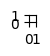

In [2]:
# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.axhline(y=1, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})

## Initialization

In [3]:
# Variables for the per capita growth rate
tmax = 2
time = np.linspace(1,tmax,tmax)

y1 = np.zeros(tmax)
y2 = np.zeros(tmax)
#y1_t = np.zeros(tmax)
#y2_t = np.zeros(tmax)
per_capita1 = np.zeros(tmax)
per_capita2 = np.zeros(tmax)

y1[0], y2[0] = 5, 5 # initial conditions

## Parameters

r1=20
r2=16
a11=2.7
a12=0.6
a21=0.6
a22=0.6

## cov > 0

r1=20
r2=12
a11=1
a12=1
a21=0.1
a22=1

## cov < 0

r1=20
r2=11
a11=1
a12=1
a21=0.1
a22=1

## cov = zero

r1=20
r2=11
a11=1
a12=1
a21=1
a22=1

In [4]:
r1=17
r2=19
a11=2.1
a12=0.3
a21=0.1
a22=0.9

In [5]:
## Discrete-time competitive Beverton-Holt model
i=0
stopRun=0
while stopRun==0: # stops the simulation when the dynamics converges
#    y1_t[i+1] = y1[i] # y1 in the previous step, y1[t-1]
#    y2_t[i+1] = y2[i] # y2 in the previous step, y2[t-1]
    per_capita1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
    per_capita2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
    y1[i+1] = y1[i] * per_capita1[i]
    y2[i+1] = y2[i] * per_capita2[i]
    per_capita1=np.append(per_capita1,per_capita1[i])
    per_capita2=np.append(per_capita2,per_capita2[i])
    y1=np.append(y1,y1[i])
    y2=np.append(y2,y2[i])
    if(np.abs(y1[i+1]-y1[i]) and np.abs(y2[i+1]-y2[i]) < 0.01):
        stopRun=1
    i+=1 # i=i+1

## Relative frequency

In [6]:
y_rel1 = np.zeros(len(y1))
y_rel2 = np.zeros(len(y1))
for i in range(len(y1)):
    y_rel1[i]=y1[i]/(y1[i]+y2[i])
    y_rel2[i]=y2[i]/(y1[i]+y2[i])

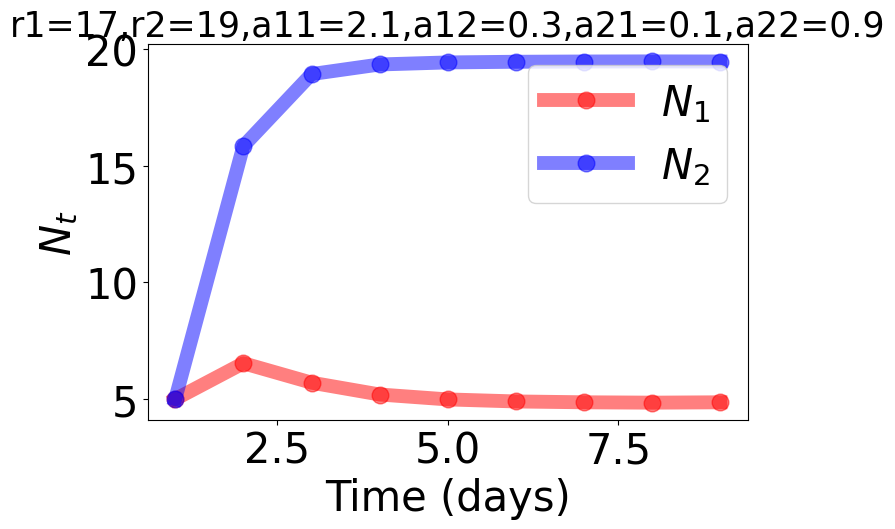

In [7]:
tmax = len(y1)
time = np.linspace(1,tmax,tmax)

fig, (ax) = plt.subplots(1,figsize=(8, 6))
ax.plot(time, y1, alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(time, y2, alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.set(xlabel='Time (days)', ylabel='$N_{t}$')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/yenni_time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

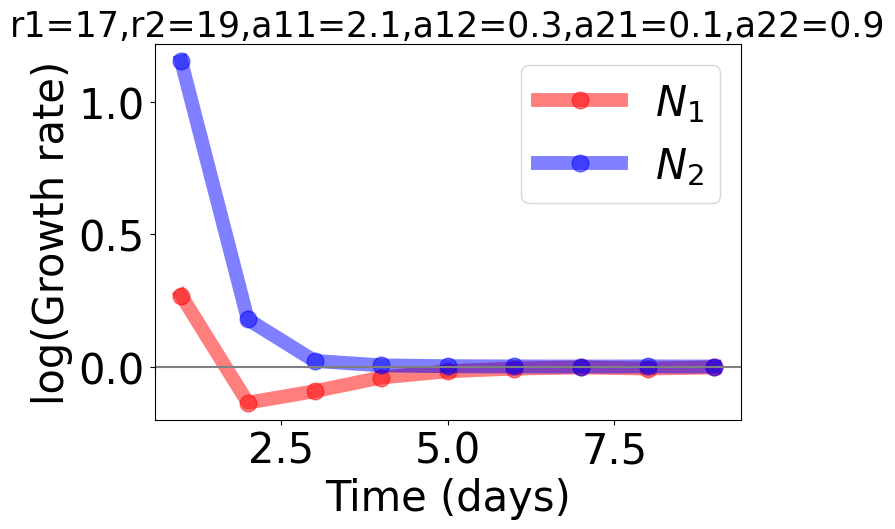

In [8]:
tmax = len(y1)
time = np.linspace(1,tmax,tmax)

fig, (ax) = plt.subplots(1,figsize=(8, 6))
ax.plot(time, np.log(per_capita1), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(time, np.log(per_capita2), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.set(xlabel='Time (days)', ylabel='log(Growth rate)')
ax.axhline(y=0, color='grey', linestyle='-')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/yenni_time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

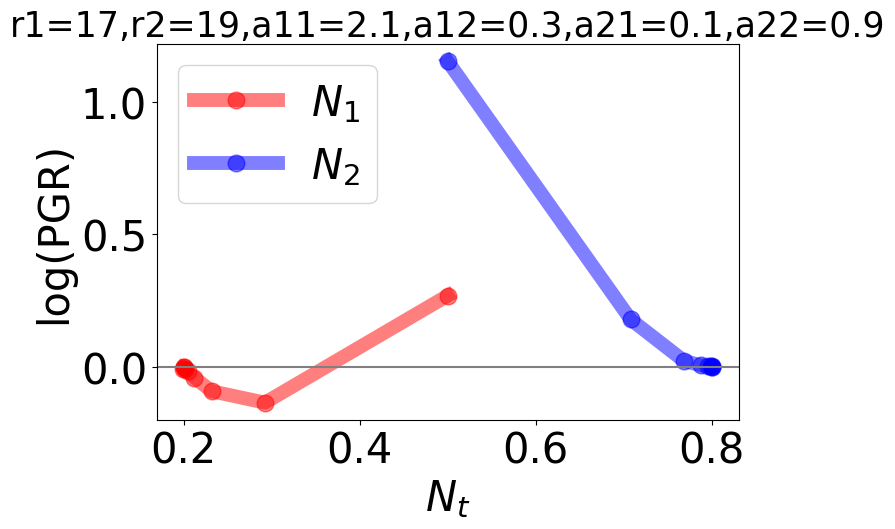

In [9]:
fig, (ax) = plt.subplots(1,figsize=(8, 6))
ax.plot(y_rel1,np.log(per_capita1), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(y_rel2,np.log(per_capita2), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.set(xlabel='$N_t$', ylabel='log(PGR)')
ax.axhline(y=0, color='grey', linestyle='-')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
#plt.savefig('img/yenni_time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

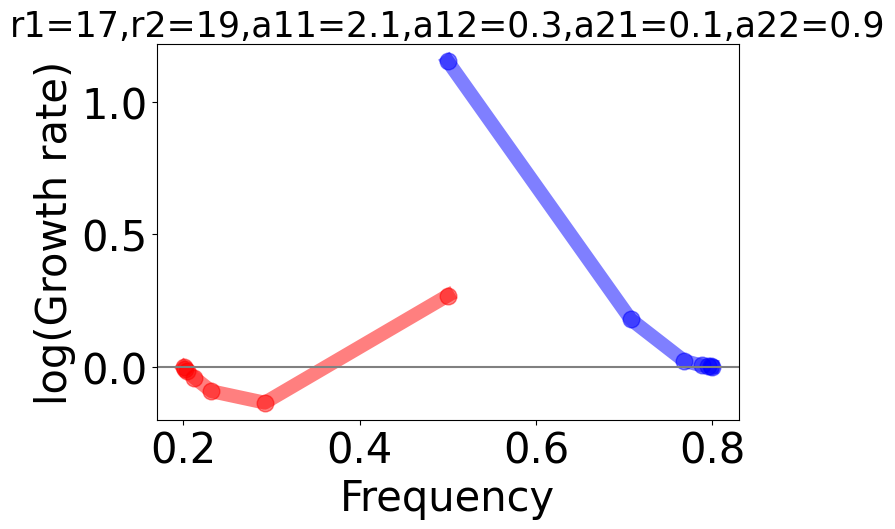

In [10]:
# Same result:
growth1 = np.log(y1[1:-1])-np.log(y1[0:-2])
growth2 = np.log(y2[1:-1])-np.log(y2[0:-2])

fig, (ax) = plt.subplots(1,figsize=(8, 6))
ax.plot(y_rel1[:-2], growth1, alpha=0.5,marker="o", linewidth=10, markersize=12, color="r")
ax.plot(y_rel2[:-2], growth2, alpha=0.5,marker="o", linewidth=10, markersize=12, color="b")
ax.set(xlabel='Frequency', ylabel='log(Growth rate)')
ax.axhline(y=0, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/yenni_time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

In [11]:
cov=np.zeros(0)
final_abundance1=np.zeros(0)
final_abundance2=np.zeros(0)
step=2

df=open('output_2.txt','w')
df.write("r1" + "\t" + "r2" + "\t" + "a11" + "\t" + "a12" + "\t" + "a21" + "\t" + "a22" + "\t" + "N1_final" + "\t" + "N2_final" + "\t" + "N1_rel_final" + "\t" + "N2_rel_final" + "\t" + "average_growth1" + "\t" + "average_growth2" + "\t" + "log_average_growth1" + "\t" + "log_average_growth2" + "\t" + "S1" + "\t" + "S2" + "\n")
for r1 in range(15,21,step):
    for r2 in range(11,21,step):
        for a11 in np.arange(0.7,3.1,step/10):
            for a12 in np.arange(0.1,1.1,step/10):
                for a21 in np.arange(0.1,1.1,step/10):
                    for a22 in np.arange(0.1,1.1,step/10):
                        ## Strength of stabilization
                        S1=r2/(1+(a12/a22)*(r2-1))
                        S2=r1/(1+(a21/a11)*(r1-1))                     
                        ## Discrete-time competitive Beverton-Holt model
                        i=0
                        stopRun=0
                        while stopRun==0:
                            per_capita1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
                            per_capita2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
                            y1[i+1] = y1[i] * per_capita1[i]
                            y2[i+1] = y2[i] * per_capita2[i]
                            per_capita1=np.append(per_capita1,per_capita1[i])
                            per_capita2=np.append(per_capita2,per_capita2[i])
                            y1=np.append(y1,y1[i])
                            y2=np.append(y2,y2[i])
                            if(np.abs(y1[i+1]-y1[i]) and np.abs(y2[i+1]-y2[i]) < 0.01):
                                stopRun=1
                            i+=1
                            if i>2000:
                                continue
#                        y_rel1 = y1/(y1+y2)
#                        y_rel2 = y2/(y1+y2)
                        S=np.array([S1,S2])
                        abundance=np.array([np.mean(y1),np.mean(y2)])#([y1[-1],y2[-1]]) # mean or final abundance?
                        final_abundance1=np.append(final_abundance1,y1[-1])
                        final_abundance2=np.append(final_abundance2,y2[-1])
                        cov=np.append(cov,np.cov(abundance, S)[0][1])
                        df.write(str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(y1[-1]) + "\t" + str(y2[-1]) + "\t" + str(y1[-1]/(y1[-1]+y2[-1])) + "\t" + str(y2[-1]/(y1[-1]+y2[-1])) + "\t" + str((np.average(per_capita1))) + "\t" + str((np.average(per_capita2))) + "\t" + str(np.log(np.average(per_capita1))) + "\t" + str(np.log(np.average(per_capita2))) + "\t" + str(S1) + "\t" + str(S2))
                        df.write('\n')
df.close()

#relat_abundance1 = final_abundance1 / ( final_abundance1 + final_abundance2 )
#relat_abundance2 = final_abundance2 / ( final_abundance1 + final_abundance2 )